# Group F - Energy Conversion: Calibration Interpolation

## Converting Voltage Signals from the BLMs and Intensity Monitors to Proton Amounts (Dummy Data Used)

In [3]:
import glob
import pandas as pd
import random
import paho.mqtt.client as mqtt
import string
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange

In [4]:
files = glob.glob("C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle" + '/*.csv')
selected_file = files[0]

>We were given a calibration coefficient ($Cal_{R5IM}$), which can be multiplied with the voltage to find the number of protons.

In [5]:
R5IM_calibration_coefficient = 4E12

In [6]:
input_data = pd.read_csv(selected_file)
dataframe = input_data.drop(columns = input_data.columns[0]).to_numpy()

In [7]:
x = np.linspace(-0.5,10.5,2200)

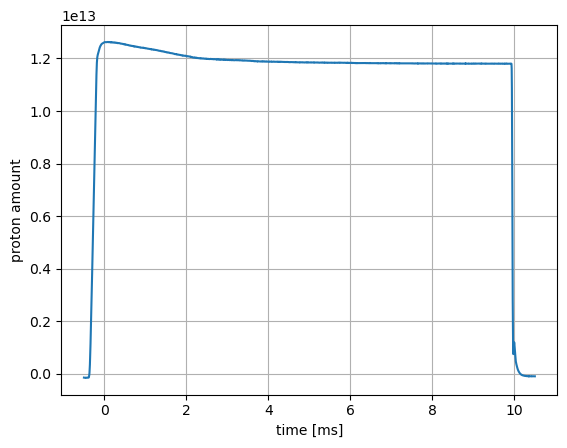

In [8]:
protons = (dataframe[39] * R5IM_calibration_coefficient) * -1

plt.plot(x, protons)
plt.xlabel('time [ms]')
plt.ylabel('proton amount')
plt.grid()

>This graph displays the number of protons in the intensity monitor in one cycle of the synchrotron. It is energy-independent, therefore the calibration coefficient stays the same and is not dependent on the beam energy of the system.

## Researching interpolation

>We found four main methods of interpolation:
> 1. **Linear** - Creates straight lines between data points
> 2. **Cubic Spline** - Creates a cubic function between each adjacent data point
> 3. **Lagrange Polynomial** - Creates one polynomial which passes through all data points
> 4. **Newton Polynomial** - Uses a mathematical function to divide the difference between the data points by the difference between the point and the origin iteratively

### Cubic Spline Interpolation

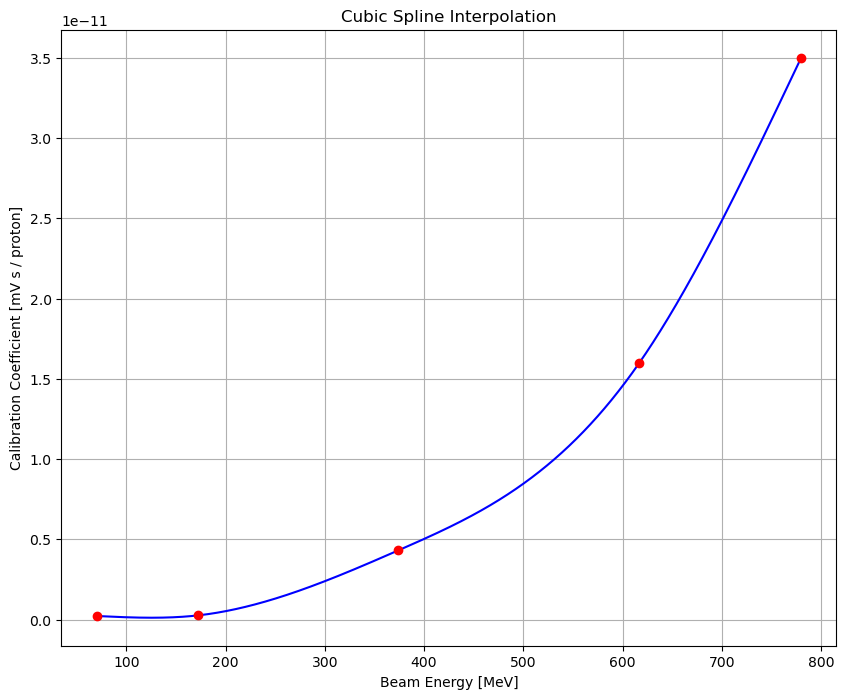

In [9]:
x = [70, 172, 374, 617, 780]
y = [2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11]
def cubic_interpolation(x,y):
    from scipy.interpolate import CubicSpline
    f = CubicSpline(x, y, bc_type='natural')

   
    #highest_energy = float(input('What is the highest beam energy? '))
    x_new = np.arange(70, x[len(x)-1], 0.1)
    y_new = f(x_new)
    plt.figure(figsize = (10,8))
    plt.plot(x_new, y_new, 'b')
    plt.plot(x, y, 'ro')
    plt.grid()
    plt.title('Cubic Spline Interpolation')
    plt.xlabel('Beam Energy [MeV]')
    plt.ylabel('Calibration Coefficient [mV s / proton]')
cubic_interpolation(x,y)

### Lagrange Polynomial Interpolation

In [10]:
f = lagrange(x, y)
x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
x_new = np.arange(70, 780, 0.1)

Text(0, 0.5, 'Calibration Coefficient [mVs/proton]')

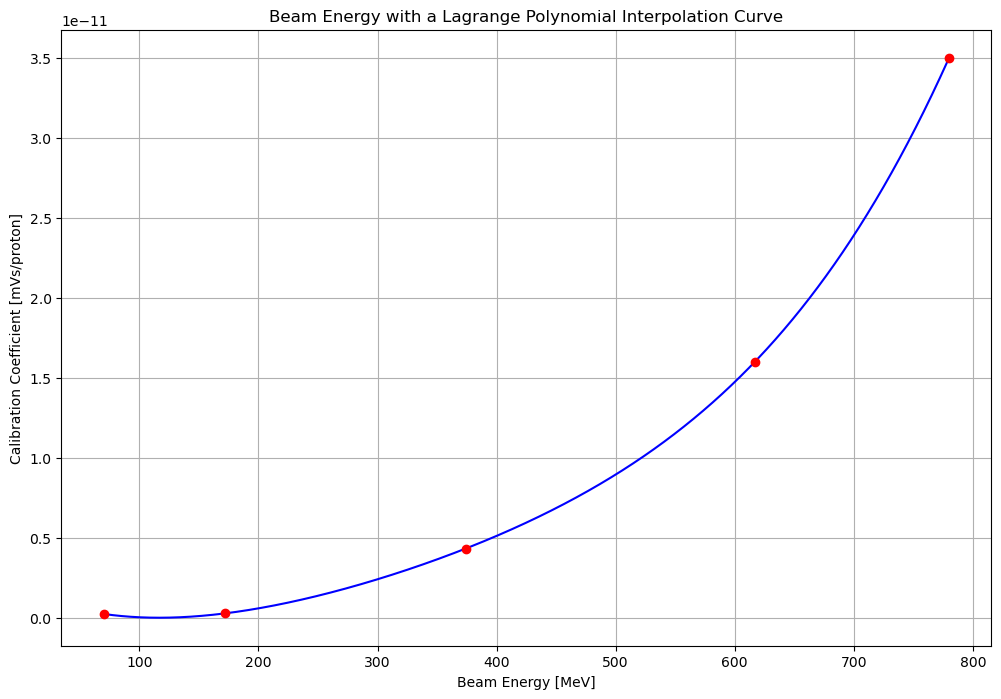

In [11]:
fig = plt.figure(figsize = (12,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.grid()
plt.title('Beam Energy with a Lagrange Polynomial Interpolation Curve')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')

### Newton Polynomial Interpolation

In [12]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, mstime, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(mstime) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -mstime[n-k])*p
    return p

Text(0, 0.5, 'Calibration Coefficient [mVs/proton]')

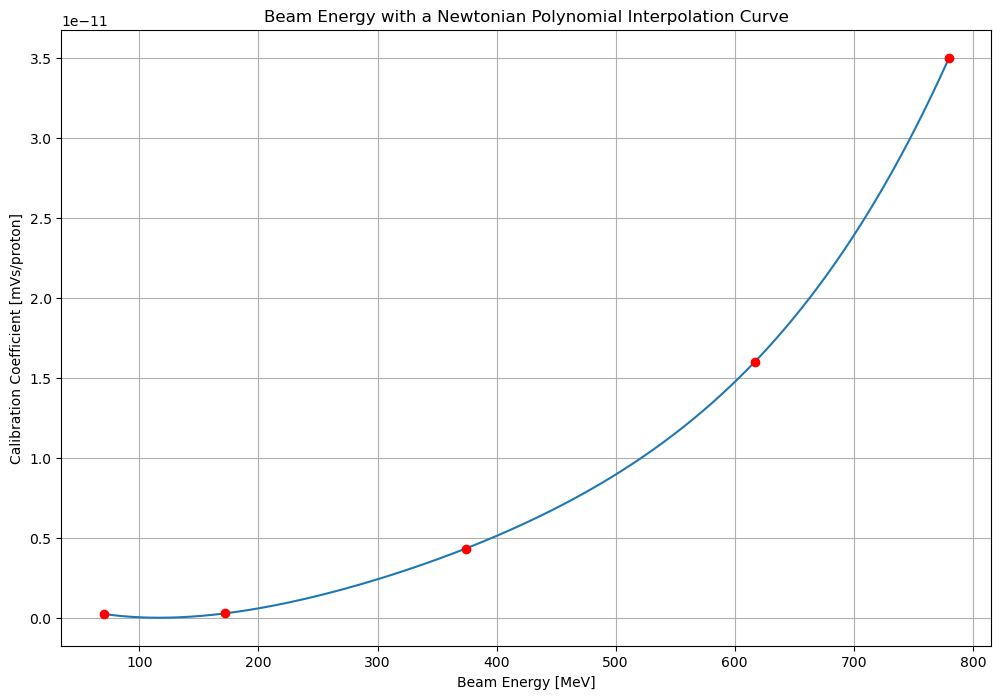

In [15]:
x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12,  1.60E-11, 3.50E-11])
a_s = divided_diff(x, y)[0, :]
# get the divided difference coef
x_new = np.arange(70, 780, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x_new, y_new)
plt.plot(x, y, 'ro')
plt.grid()
plt.title('Beam Energy with a Newtonian Polynomial Interpolation Curve')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')

## Testing the Speed of Interpolation Methods

In [ ]:
timetaken = []
for g in range (1000):
    start = time.perf_counter()
    *function*(x,y)
    end = time.perf_counter()
    timetaken.append(end - start)
    plt.close()
print(np.mean(timetaken))

- 0.039633691409375754 avg time for Cubic Spline Interpolation from 10000 cycles
- 0.03890113494969555 avg time for Newtonian Polynomial Interpolation from 10000 cycles
- 0.03839471215988742  avg time for Lagrange Polynomial Interpolation from 10000 cycles
- Conclusion: Time difference is negligible

## Current Work

> - We are working on a method to test the accuracy of our interpolation methods. 
> - We are working on a method to change the maximum energy in the synchrotron (and predict how this would affect the data curve).

## Future Work

> - We will (hopefully) be working with Group G to merge our interpolation with their integration in order to find how the number of protons changes with the energy increase of the beam. 